In [1]:
import pandas as pd
import pymssql

database = "group2"
table = "dbo.stock_table"
username = "group2user"
password  = "everythingIsAwesome!"
server = "database2108.database.windows.net"

conn = pymssql.connect(server,username, password,database)

cursor = conn.cursor()
query = "SELECT * FROM dbo.stock_table"
df = pd.read_sql(query, conn)

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day



print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21642 entries, 0 to 21641
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       21642 non-null  object 
 1   Ticker_ID  21642 non-null  int64  
 2   Ticker     21642 non-null  object 
 3   Open       21642 non-null  float64
 4   High       21642 non-null  float64
 5   Low        21642 non-null  float64
 6   Close      21642 non-null  float64
 7   Volume     21642 non-null  float64
 8   Perc       21642 non-null  float64
 9   SP_Open    21642 non-null  float64
 10  SP_High    21642 non-null  float64
 11  SP_Low     21642 non-null  float64
 12  SP_Close   21642 non-null  float64
 13  SP_perc    21642 non-null  float64
 14  Year       21642 non-null  int64  
 15  Month      21642 non-null  int64  
 16  Day        21642 non-null  int64  
dtypes: float64(11), int64(4), object(2)
memory usage: 2.8+ MB
None


,Date,Ticker_ID,Ticker,Open,High,Low,Close,Volume,Perc,SP_Open,SP_High,SP_Low,SP_Close,SP_perc,Year,Month,Day
0,2007-07-03,5,BOH,52.349998,52.779999,52.349998,52.639999,83000.0,0.007079,1524.869995,1526.01001,1519.119995,1524.869995,0.00358,2007,7,3
1,2007-07-03,4,DFS,27.500000,27.500000,26.150000,26.670000,8600100.0,-0.030182,1524.869995,1526.01001,1519.119995,1524.869995,0.00358,2007,7,3
2,2007-07-03,6,GS,220.339996,224.899994,219.990005,224.550003,4676800.0,0.024500,1524.869995,1526.01001,1519.119995,1524.869995,0.00358,2007,7,3
3,2007-07-03,1,JPM,49.189999,49.580002,49.040001,49.340000,7444000.0,0.003866,1524.869995,1526.01001,1519.119995,1524.869995,0.00358,2007,7,3
4,2007-07-03,3,NYCB,17.389999,17.410000,17.190001,17.250000,1308800.0,-0.003466,1524.869995,1526.01001,1519.119995,1524.869995,0.00358,2007,7,3


In [2]:
df['C_weighted'] = df.groupby('Ticker')['Close'].ewm(alpha=0.5, adjust=True).mean().reset_index(0, drop = True) # using alpha


In [3]:
### add comparison column
import numpy as np

df['comparison'] = np.where(df['Perc'] > df['SP_perc'], 1, 0)
df.loc[df['Ticker'] == 'JPM', 'Market'] = 'Large'
df.loc[df['Ticker'] == 'GS', 'Market'] = 'Large'
df.loc[df['Ticker'] == 'NYCB', 'Market'] = 'Small'
df.loc[df['Ticker'] == 'BOH', 'Market'] = 'Small'
df.loc[df['Ticker'] == 'DFS', 'Market'] = 'Mid'
df.loc[df['Ticker'] == 'SNV', 'Market'] = 'Mid'

In [4]:

df['Perc_diff'] = df['Perc'] - df['SP_perc'] # create new column made from difference between Perc and SP_perc
df['Diff1'] = df.groupby(['Ticker'])['Perc_diff'].shift(1) # get the previous day's difference between Perc and SP_perc
df['Diff2'] = df.groupby(['Ticker'])['Perc_diff'].shift(2) # get 2 day's previous difference between Perc and SP_perc
df['Diff3'] = df.groupby(['Ticker'])['Perc_diff'].shift(3) # get 3 day's previous difference between Perc and SP_perc
df['Diff4'] = df.groupby(['Ticker'])['Perc_diff'].shift(4) # get 4 day's previous difference between Perc and SP_perc
df['Diff5'] = df.groupby(['Ticker'])['Perc_diff'].shift(5) # get 5 day's previous difference between Perc and SP_perc

df.head()

,Date,Ticker_ID,Ticker,Open,High,Low,Close,Volume,Perc,SP_Open,...,Day,C_weighted,comparison,Market,Perc_diff,Diff1,Diff2,Diff3,Diff4,Diff5
0,2007-07-03,5,BOH,52.349998,52.779999,52.349998,52.639999,83000.0,0.007079,1524.869995,...,3,52.639999,1,Small,0.003498,NaN,NaN,NaN,NaN,NaN
1,2007-07-03,4,DFS,27.500000,27.500000,26.150000,26.670000,8600100.0,-0.030182,1524.869995,...,3,26.670000,0,Mid,-0.033762,NaN,NaN,NaN,NaN,NaN
2,2007-07-03,6,GS,220.339996,224.899994,219.990005,224.550003,4676800.0,0.024500,1524.869995,...,3,224.550003,1,Large,0.020920,NaN,NaN,NaN,NaN,NaN
3,2007-07-03,1,JPM,49.189999,49.580002,49.040001,49.340000,7444000.0,0.003866,1524.869995,...,3,49.340000,1,Large,0.000285,NaN,NaN,NaN,NaN,NaN
4,2007-07-03,3,NYCB,17.389999,17.410000,17.190001,17.250000,1308800.0,-0.003466,1524.869995,...,3,17.250000,0,Small,-0.007046,NaN,NaN,NaN,NaN,NaN


In [12]:
df[10:20] # find where the NaN's stop

,Date,Ticker_ID,Ticker,Open,High,Low,Close,Volume,Perc,SP_Open,...,Day,C_weighted,comparison,Market,Perc_diff,Diff1,Diff2,Diff3,Diff4,Diff5
10,2007-07-05,3,NYCB,17.280001,17.420000,17.250000,17.400000,1184100.0,0.008696,1525.400024,...,5,17.350000,1,Small,0.008348,-0.007046,NaN,NaN,NaN,NaN
11,2007-07-05,2,SNV,96.639198,96.884102,95.200401,95.414703,162400.0,-0.009534,1525.400024,...,5,95.720835,0,Mid,-0.009881,0.009294,NaN,NaN,NaN,NaN
12,2007-07-06,5,BOH,52.459999,52.669998,52.320000,52.480000,121300.0,-0.001522,1530.439941,...,6,52.525714,0,Small,-0.004826,-0.001867,0.003498,NaN,NaN,NaN
13,2007-07-06,4,DFS,25.639999,25.860001,25.209999,25.639999,7211800.0,-0.011184,1530.439941,...,6,25.870000,0,Mid,-0.014488,-0.028094,-0.033762,NaN,NaN,NaN
14,2007-07-06,6,GS,220.759995,224.220001,220.699997,223.639999,4122400.0,0.010483,1530.439941,...,6,223.107145,1,Large,0.007178,-0.014732,0.020920,NaN,NaN,NaN
15,2007-07-06,1,JPM,48.619999,49.160000,48.450001,48.970001,10792400.0,0.003689,1530.439941,...,6,48.971430,1,Large,0.000385,-0.011495,0.000285,NaN,NaN,NaN
16,2007-07-06,3,NYCB,17.480000,17.610001,17.389999,17.610001,1472000.0,0.012069,1530.439941,...,6,17.498572,1,Small,0.008765,0.008348,-0.007046,NaN,NaN,NaN
17,2007-07-06,2,SNV,95.782097,95.812698,94.924896,95.751404,238800.0,0.003529,1530.439941,...,6,95.738303,1,Mid,0.000225,-0.009881,0.009294,NaN,NaN,NaN
18,2007-07-09,5,BOH,52.490002,52.580002,51.279999,51.610001,200400.0,-0.016578,1531.849976,...,9,52.037334,0,Small,-0.017499,-0.004826,-0.001867,0.003498,NaN,NaN
19,2007-07-09,4,DFS,25.719999,26.540001,25.440001,25.540001,11675200.0,-0.003900,1531.849976,...,9,25.694000,0,Mid,-0.004821,-0.014488,-0.028094,-0.033762,NaN,NaN


**Machine Learning Model**

In [13]:
df_ml = df[12:] # if Diff 1 and Diff2 are only columns
# df_ml = df[30:] # if all 5 Diff columns are included

y = df_ml.comparison
X = df_ml.drop(['comparison'], axis = 1)
X = X.drop(['SP_perc'], axis = 1) # drop SP_perc from model

dummies = pd.get_dummies(X['Market'], drop_first = True) # get dummies for Market column
X = pd.merge(X, dummies, left_index = True, right_index = True)

X = X.drop(['Ticker', 'Ticker_ID', 'Market', 'Date'], axis = 1) # drop non-numeric columns


X = X.drop(['Diff3', 'Diff4', 'Diff5'], axis = 1)

X = X.drop(['High', 'Low', 'Close', 'Open'], axis = 1) 
X = X.drop(['SP_Close', 'SP_High', 'SP_Low', 'SP_Open'], axis = 1)



X = X.drop(['Perc_diff'], axis = 1) # drop Perc_diff from model
X = X.drop(['Volume'], axis = 1) # drop Volume
X = X.drop(['Year'], axis = 1) # drop Year
X = X.drop(['Month'], axis = 1) # drop Month
X = X.drop(['Day'], axis = 1) # drop Day


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train

,Perc,C_weighted,Diff1,Diff2,Mid,Small
11752,-0.002934,17.006468,0.006934,-0.008720,0,1
17628,-0.015666,82.240649,0.005003,0.002069,0,1
7376,-0.011405,98.359290,-0.012318,0.006748,0,0
6681,0.084384,29.871993,-0.022790,-0.005364,0,0
15910,0.016974,13.551389,0.033100,0.007146,0,1
...,...,...,...,...,...,...
13135,-0.010777,48.682495,0.001613,0.006303,1,0
19660,0.024390,9.645518,-0.025954,-0.015882,0,1
9857,0.000000,24.968420,-0.010899,-0.000495,1,0
10811,-0.002896,24.077751,0.003521,-0.000195,1,0


In [14]:
import pickle

with open('Capstone_ML' , 'rb') as f:
    lr = pickle.load(f)

clf = lr.fit(X_train, y_train)

print(clf.coef_)
print(clf.intercept_)

clf.score(X_test, y_test)

[[ 1.33889047e+02 -6.52637681e-05 -2.51260710e+00 -2.98405819e+00
   4.01575785e-02  8.89593818e-02]]
[-0.17235917]


0.8106796116504854

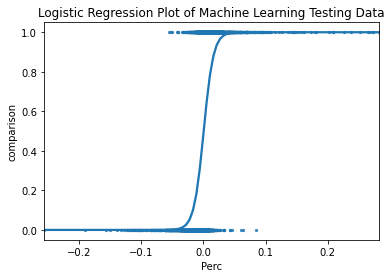

In [15]:
import seaborn as sns
#sns.set_theme(color_codes=True)
ax = sns.regplot(x=X_test.Perc, y=y_test, logistic=True,
                scatter_kws={'s':5}).set(title = "Logistic Regression Plot of Machine Learning Testing Data")

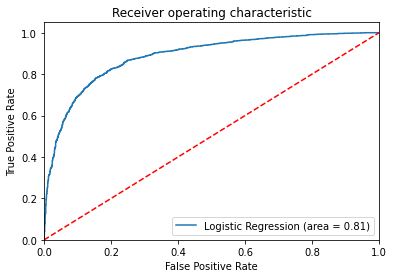

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()